In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [42]:
df = pd.read_csv('../../data/mendeley_data/HateSpeechDatasetBalanced.csv')
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [43]:
df["Label"] = df["Label"].map({1:"hate", 0: "noHate"})
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,hate
1,just by being able to tweet this insufferable ...,hate
2,that is retarded you too cute to be single tha...,hate
3,thought of a real badass mongol style declarat...,hate
4,afro american basho,hate


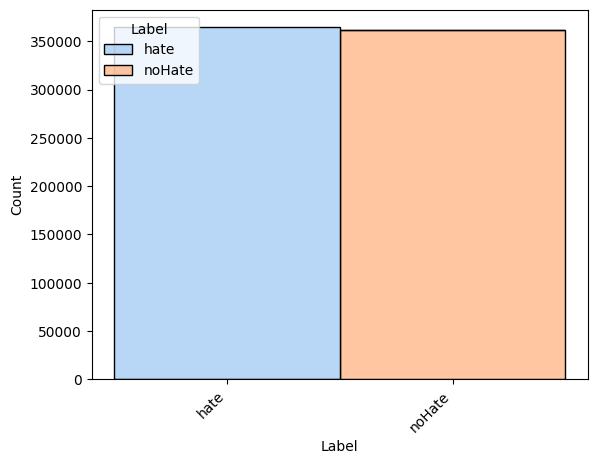

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Label' is the column containing 'Hate' and 'noHate'
sns.histplot(df, x='Label', hue='Label', multiple='stack', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.show()


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  object
dtypes: object(2)
memory usage: 11.1+ MB


In [46]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer

# # Filter tweets labeled as "Hate"
# hate_tweets = df[df['Label'] == 'hate']['Content']

# # Tokenize and create vocabulary using CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(hate_tweets)
# vocab = vectorizer.get_feature_names_out()

# # Add the vocabulary as a new column (same for all rows)
# df['HateVocab'] = [', '.join(vocab)] * len(df)

# # Display the DataFrame
# print(df)



# Ensure you have the required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Filter tweets labeled as "Hate"
hate_tweets = df[df['Label'] == 'hate']['Content']

# Tokenize, remove stopwords and punctuation, and create vocabulary
stop_words = set(stopwords.words('english'))
vocab = set()

for tweet in hate_tweets:
    words = word_tokenize(tweet)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]
    vocab.update(filtered_words)

# Add the vocabulary as a new column (same for all rows)
df['HateVocab'] = [', '.join(vocab)] * len(df)

# Display the DataFrame
print(df)


[nltk_data] Downloading package punkt to C:\Users\Shehryar
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shehryar
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  Content Label  \
0       denial of normal the con be asked to comment o...  hate   
1       just by being able to tweet this insufferable ...  hate   
2       that is retarded you too cute to be single tha...  hate   
3       thought of a real badass mongol style declarat...  hate   
4                                     afro american basho  hate   
...                                                   ...   ...   
726114  i mute this telecasting and played kanye west ...  hate   
726115  but hell yeah he s not a bachelor but looooooo...  hate   
726116  great video musician but s not my musician lol...  hate   
726117  not great pop video yeah he s not a pedophile ...  hate   
726118  great video yeah he s non a paedophile lolllll...  hate   

                                                HateVocab  
0       fairness, shat, specialized, oasis, beautiful,...  
1       fairness, shat, specialized, oasis, beautiful,...  
2       fairnes

In [47]:
from collections import Counter
# Filter tweets labeled as "Hate"
hate_tweets = df[df['Label'] == 'hate']['Content']

# Tokenize, remove stopwords and punctuation, and create a list of words
stop_words = set(stopwords.words('english'))
all_words = []

for tweet in hate_tweets:
    words = word_tokenize(tweet)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]
    all_words.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(all_words)


C:\Users\Shehryar Mirza\AppData\Local\Temp\ipykernel_7940\4193312947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df.head(20), x='Frequency', y='Word', palette='viridis')


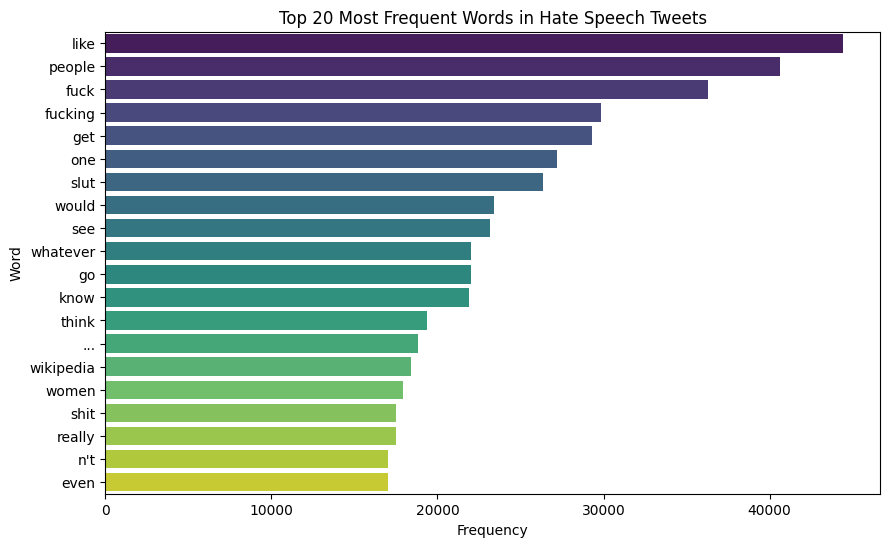

In [48]:

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df.head(20), x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Hate Speech Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [49]:
# Mapping 'hate' to 1 and 'noHate' to 0
df['Label'] = df['Label'].map({'hate': 1, 'noHate': 0})
df

,Content,Label,HateVocab
0,denial of normal the con be asked to comment o...,1,"fairness, shat, specialized, oasis, beautiful,..."
1,just by being able to tweet this insufferable ...,1,"fairness, shat, specialized, oasis, beautiful,..."
2,that is retarded you too cute to be single tha...,1,"fairness, shat, specialized, oasis, beautiful,..."
3,thought of a real badass mongol style declarat...,1,"fairness, shat, specialized, oasis, beautiful,..."
4,afro american basho,1,"fairness, shat, specialized, oasis, beautiful,..."
...,...,...,...
726114,i mute this telecasting and played kanye west ...,1,"fairness, shat, specialized, oasis, beautiful,..."
726115,but hell yeah he s not a bachelor but looooooo...,1,"fairness, shat, specialized, oasis, beautiful,..."
726116,great video musician but s not my musician lol...,1,"fairness, shat, specialized, oasis, beautiful,..."
726117,not great pop video yeah he s not a pedophile ...,1,"fairness, shat, specialized, oasis, beautiful,..."


In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Split the data into training, validation, and test sets

X_train, X_temp, y_train, y_temp = train_test_split(df['Content'], df['Label'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import re 

In [52]:

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


d:\AnaConda\envs\project\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [53]:
# Train the model with explicit validation data
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_val_pad, y_val))
#589m 58.7s

Epoch 1/5
7942/7942 ━━━━━━━━━━━━━━━━━━━━ 6247s 786ms/step - accuracy: 0.8138 - loss: 0.3984 - val_accuracy: 0.8661 - val_loss: 0.3031
Epoch 2/5
7942/7942 ━━━━━━━━━━━━━━━━━━━━ 7515s 946ms/step - accuracy: 0.8900 - loss: 0.2568 - val_accuracy: 0.8810 - val_loss: 0.2784
Epoch 3/5
7942/7942 ━━━━━━━━━━━━━━━━━━━━ 6348s 799ms/step - accuracy: 0.9221 - loss: 0.1870 - val_accuracy: 0.8895 - val_loss: 0.2759
Epoch 4/5
7942/7942 ━━━━━━━━━━━━━━━━━━━━ 6368s 802ms/step - accuracy: 0.9424 - loss: 0.1411 - val_accuracy: 0.8900 - val_loss: 0.2870
Epoch 5/5
7942/7942 ━━━━━━━━━━━━━━━━━━━━ 7721s 972ms/step - accuracy: 0.9560 - loss: 0.1101 - val_accuracy: 0.8912 - val_loss: 0.3106


In [54]:
model.save('new_model.h5')

In [105]:
df.shape


(726119, 3)

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 310, 128)       │    15,640,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 310, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 310, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,340,869 (180.59 MB)

 Trainable params: 15,780,289 (60.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,560,580 (120.39 MB)

In [56]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')



3404/3404 ━━━━━━━━━━━━━━━━━━━━ 577s 170ms/step - accuracy: 0.8911 - loss: 0.3099
Test Accuracy: 89.10%


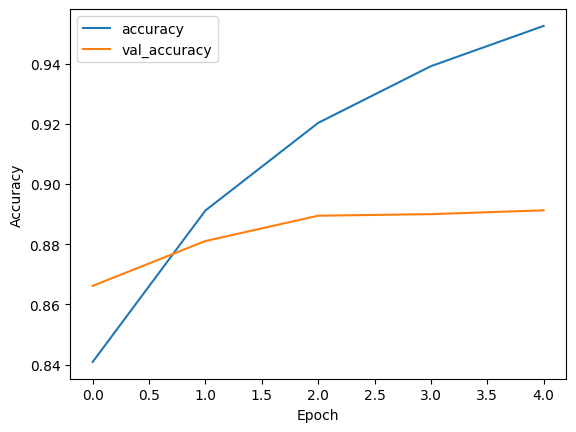

In [57]:
# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plotting training & validation accuracy and loss
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()
    
    

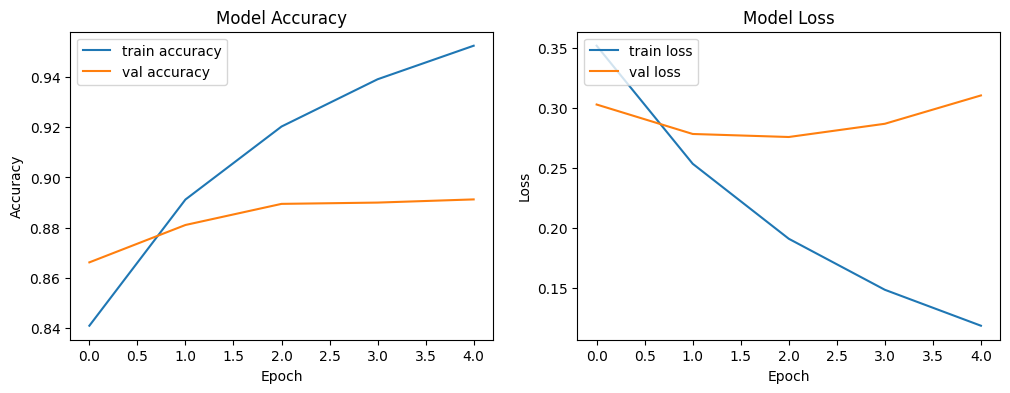

In [59]:
plot_history(history)

In [60]:

# Predicting the labels for the test set
test_predictions = (model.predict(X_test_pad) > 0.5).astype('int32')

3404/3404 ━━━━━━━━━━━━━━━━━━━━ 558s 163ms/step


d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:


d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.66     54155
           1       0.00      0.00      0.00     54763

    accuracy                           0.50    108918
   macro avg       0.25      0.50      0.33    108918
weighted avg       0.25      0.50      0.33    108918



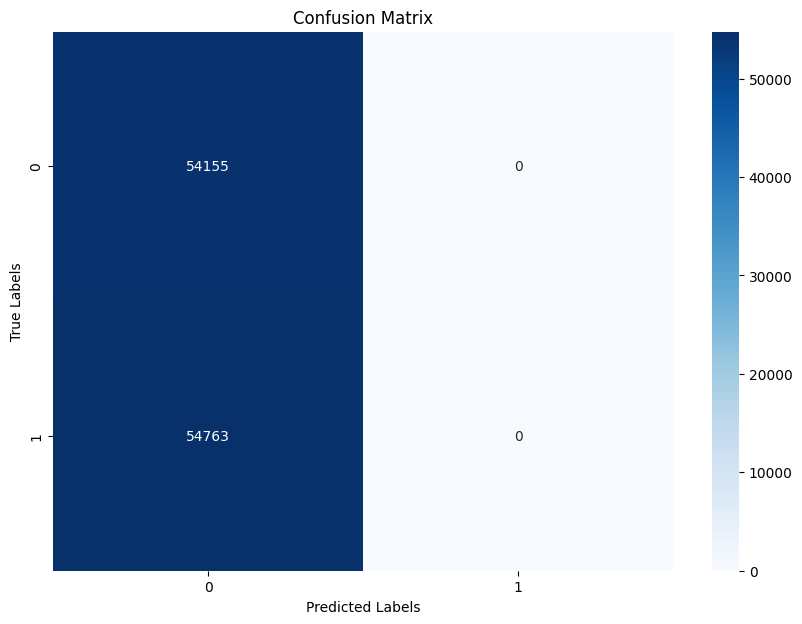

Accuracy: 0.4972
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predicting the labels for the test set
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions_classes)

# Classification Report
class_report = classification_report(y_test, test_predictions_classes, output_dict=True)
print("Classification Report:")
print(classification_report(y_test , test_predictions_classes))

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Extracting metrics
accuracy = class_report['accuracy']
precision = class_report['1']['precision']
recall = class_report['1']['recall']
f1_score = class_report['1']['f1-score']


# Printing the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")



In [155]:
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the model
model = load_model('new_model.h5')

# Load the tokenizer
with open("../../notebooks/tokenizer.pkl", 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define a function to preprocess and make predictions on new text data
def predict_hate_speech(text):
    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([text])
    
    # Pad the sequence
    padded_sequence = pad_sequences(tokens, maxlen=500, padding='post')
    
    # Make predictions
    prediction = model.predict(padded_sequence)
    
    # Apply thresholding
    if prediction[0][0] >= 0.5:
        return "Hate speech detected"
    else:
        return "No hate speech detected"

# Test the function
new_text = "ugly boy"
print(predict_hate_speech(new_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
Hate speech detected
